## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [3]:
# Read the resumes data from CSV
df = pd.read_csv('Ex_updated.csv')
df.columns

Index(['POSITION_TITLE', 'resume number', 'QUALIFICATIONS', 'EDUCATION_TYPE',
       'SCHOOL_TYPE', 'EDUCATION_MAJOR', 'EXPERIENCE_LENGTH', 'AWARDS',
       'COMMUNITY SERVICE', 'VOLUNTEERING', 'DRIVERS_LICENSE_AVAILABILITY',
       'SKILLS_COUNT', 'SKILLS', 'Languages', 'CATEGORY'],
      dtype='object')

In [4]:
# Remove square brackets from columns containing lists

df["EXPERIENCE_LENGTH"]=df["EXPERIENCE_LENGTH"].str.strip("[]")

df["AWARDS"]=df["AWARDS"].str.strip("[]")

df["QUALIFICATIONS"]=df["QUALIFICATIONS"].str.strip("[]")
df["SKILLS"]=df["SKILLS"].str.strip("[]").str.strip(",").str.strip("$").str.strip("'").str.strip("',")

df

,POSITION_TITLE,resume number,QUALIFICATIONS,EDUCATION_TYPE,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,AWARDS,COMMUNITY SERVICE,VOLUNTEERING,DRIVERS_LICENSE_AVAILABILITY,SKILLS_COUNT,SKILLS,Languages
0,HR ADMINISTRATOR/MARKETING,16852973,'Focused on customer satisfaction Team manage...,Diploma,College,No info,15,' American Shrubel Leadership Scholarship to J...,No,No,No,5,"as well as computer skills, knowledge of medic...",English
1,"HR SPECIALIST,",22323967,,Master,University,No info,14,,No,No,No,40,"Adobe Photoshop, ADP, Asset Management, brandi...",English
2,HR DIRECTOR,33176873,,Master,University,No info,44,' received recognition for outstanding custome...,No,No,No,1,Recruiting FMLA/EEO/FLSA\xa0 HRIS Developmen...,English
3,HR SPECIALIST,27018550,,Diploma,No info,No info,20,,No,No,No,1,"Type ', 'with call quality and customer satisf...",English
4,HR MANAGER,17812897,"""HR SKILLS HR Department Startup Three New O...",Master,UNIVERSITY,No info,,,No,No,No,10,"""HR Department Startup Three New Organization...",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,RANK: SGT/E-5,99416532,'Inventory tracking Clear and concise communi...,Bachelor,College,No info,,"""awarded promotable status and sent to the Bas...",No,No,No,1,". Managed and accounted for over $', '...",English
2488,"GOVERNMENT RELATIONS,",24589765,,Bachelor,University,No info,16,,No,No,No,1,"Work History ', 'arbitration, agency, budg...",English
2489,GEEK SQUAD,31605080,'Windows / Mac / IOS / Android Technical Suppo...,Bachelor,University,No info,,,No,No,No,17,"Active Directory, Hardware, Customer Service, ...",English
2490,PROGRAM DIRECTOR,21190805,'qualifications include use of c...,Bachelor,University,No info,14,,Yes,Yes,No,40,"Adobe, CPR, clients, customer satisfaction, Cu...",English


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   POSITION_TITLE                2492 non-null   object
 1   resume number                 2492 non-null   object
 2   QUALIFICATIONS                2492 non-null   object
 3   EDUCATION_TYPE                2492 non-null   object
 4   SCHOOL_TYPE                   2492 non-null   object
 5   EDUCATION_MAJOR               2492 non-null   object
 6   EXPERIENCE_LENGTH             2492 non-null   object
 7   AWARDS                        2492 non-null   object
 8   COMMUNITY SERVICE             2492 non-null   object
 9   VOLUNTEERING                  2492 non-null   object
 10  DRIVERS_LICENSE_AVAILABILITY  2492 non-null   object
 11  SKILLS_COUNT                  2492 non-null   int64 
 12  SKILLS                        2492 non-null   object
 13  Languages         

In [26]:
# Rename the columns
df.columns = ['POSITION_TITLE', 'RESUME_NUMBER', 'QUALIFICATIONS', 'EDUCATION_TYPE', 'SCHOOL_TYPE', 'EDUCATION_MAJOR',
              'EXPERIENCE_LENGTH', 'AWARDS', 'COMMUNITY_SERVICE', 'VOLUNTEERING', 'DRIVERS_LICENSE_AVAILABILITY',
              'SKILLS_COUNT', 'SKILLS', 'LANGUAGES','CATEGORY']

In [7]:
df

,POSITION_TITLE,RESUME_NUMBER,QUALIFICATIONS,EDUCATION_TYPE,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,AWARDS,COMMUNITY_SERVICE,VOLUNTEERING,DRIVERS_LICENSE_AVAILABILITY,SKILLS_COUNT,SKILLS,LANGUAGES
0,HR ADMINISTRATOR/MARKETING,16852973,'Focused on customer satisfaction Team manage...,Diploma,College,No info,15,' American Shrubel Leadership Scholarship to J...,No,No,No,5,"as well as computer skills, knowledge of medic...",English
1,"HR SPECIALIST,",22323967,,Master,University,No info,14,,No,No,No,40,"Adobe Photoshop, ADP, Asset Management, brandi...",English
2,HR DIRECTOR,33176873,,Master,University,No info,44,' received recognition for outstanding custome...,No,No,No,1,Recruiting FMLA/EEO/FLSA\xa0 HRIS Developmen...,English
3,HR SPECIALIST,27018550,,Diploma,No info,No info,20,,No,No,No,1,"Type ', 'with call quality and customer satisf...",English
4,HR MANAGER,17812897,"""HR SKILLS HR Department Startup Three New O...",Master,UNIVERSITY,No info,,,No,No,No,10,"""HR Department Startup Three New Organization...",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,RANK: SGT/E-5,99416532,'Inventory tracking Clear and concise communi...,Bachelor,College,No info,,"""awarded promotable status and sent to the Bas...",No,No,No,1,". Managed and accounted for over $', '...",English
2488,"GOVERNMENT RELATIONS,",24589765,,Bachelor,University,No info,16,,No,No,No,1,"Work History ', 'arbitration, agency, budg...",English
2489,GEEK SQUAD,31605080,'Windows / Mac / IOS / Android Technical Suppo...,Bachelor,University,No info,,,No,No,No,17,"Active Directory, Hardware, Customer Service, ...",English
2490,PROGRAM DIRECTOR,21190805,'qualifications include use of c...,Bachelor,University,No info,14,,Yes,Yes,No,40,"Adobe, CPR, clients, customer satisfaction, Cu...",English


### Handling Missing Values
check if there are any missing values in the DataFrame and handle them accordingly

In [27]:
# Check for missing values
df.isnull().sum()

POSITION_TITLE                   0
RESUME_NUMBER                    0
QUALIFICATIONS                   0
EDUCATION_TYPE                   0
SCHOOL_TYPE                      0
EDUCATION_MAJOR                  0
EXPERIENCE_LENGTH                0
AWARDS                           0
COMMUNITY_SERVICE                0
VOLUNTEERING                     0
DRIVERS_LICENSE_AVAILABILITY     0
SKILLS_COUNT                     0
SKILLS                           0
LANGUAGES                        0
CATEGORY                        27
dtype: int64

In [30]:
df=df.dropna()
df.isnull().sum()

POSITION_TITLE                  0
RESUME_NUMBER                   0
QUALIFICATIONS                  0
EDUCATION_TYPE                  0
SCHOOL_TYPE                     0
EDUCATION_MAJOR                 0
EXPERIENCE_LENGTH               0
AWARDS                          0
COMMUNITY_SERVICE               0
VOLUNTEERING                    0
DRIVERS_LICENSE_AVAILABILITY    0
SKILLS_COUNT                    0
SKILLS                          0
LANGUAGES                       0
CATEGORY                        0
dtype: int64

### Handling Data Types

In [31]:
problematic_resume_number = df.loc[~df['RESUME_NUMBER'].str.isdigit(), 'RESUME_NUMBER']
print(problematic_resume_number)

332                           Switch</li> <li> Data entry
544      <div class=""sectiontitle"" id=""SECTNAME_LAN...
580     illion/yr in 3 1/2 years</li> </ul> </span> </...
795     ed IV therapy and mediation.</span> </span> </...
1089    0-6840-4b13-8b74-9eb613d0246bFRFM1""> <ul> <li...
2118    nce  Ability to follow directions from a super...
2119     with customers to ensure that they are enjoyi...
Name: RESUME_NUMBER, dtype: object


It appears that the 'RESUME_NUMBER' column contains some HTML tags and other text that is not a valid resume number. We can clean this column by removing the unwanted characters and extracting the resume numbers.

In [32]:
df['RESUME_NUMBER'] = pd.to_numeric(df['RESUME_NUMBER'], errors='coerce')
df = df.dropna(subset=['RESUME_NUMBER']).astype({'RESUME_NUMBER': int})

In [33]:
problematic_exp_len = df.loc[~df['EXPERIENCE_LENGTH'].str.isdigit(), 'EXPERIENCE_LENGTH']
print(problematic_exp_len)

0       [15]
1       [14]
2       [44]
3       [20]
4         []
        ... 
2487      []
2488    [16]
2489      []
2490    [14]
2491    [10]
Name: EXPERIENCE_LENGTH, Length: 2458, dtype: object


In [34]:
df['EXPERIENCE_LENGTH'] = pd.to_numeric(df['EXPERIENCE_LENGTH'], errors='coerce')

### Cleaning Text Columns
Some text columns may contain unnecessary characters, leading or trailing spaces, or inconsistent formatting.

In [35]:
# Clean text columns
df['POSITION_TITLE'] = df['POSITION_TITLE'].str.strip()
df['QUALIFICATIONS'] = df['QUALIFICATIONS'].str.strip()
df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].str.strip()
df['SCHOOL_TYPE'] = df['SCHOOL_TYPE'].str.strip()
df['EDUCATION_MAJOR'] = df['EDUCATION_MAJOR'].str.strip()
df['AWARDS'] = df['AWARDS'].str.strip()
df['COMMUNITY_SERVICE'] = df['COMMUNITY_SERVICE'].str.strip()
df['VOLUNTEERING'] = df['VOLUNTEERING'].str.strip()
df['DRIVERS_LICENSE_AVAILABILITY'] = df['DRIVERS_LICENSE_AVAILABILITY'].str.strip()
df['SKILLS'] = df['SKILLS'].str.strip()
df['LANGUAGES'] = df['LANGUAGES'].str.strip()

### Visualizations

In [36]:
# Count the number of applicants for each position
position_counts = df['POSITION_TITLE'].value_counts()
position_counts

BUSINESS DEVELOPMENT      81
DIRECTOR OF               63
INFORMATION TECHNOLOGY    58
Professional Summary      55
SALES ASSOCIATE           44
                          ..
CHIEF ADMINISTRATIVE       1
TELEPHONE INTERVIEWER      1
LOGISTICS TECHNICIAN       1
RESEARCH SCIENTIST         1
PROGRAM DIRECTOR           1
Name: POSITION_TITLE, Length: 1432, dtype: int64

In [37]:
top_n = 10  # Specify the number of top positions to display
top_position_counts = position_counts.head(top_n)
top_position_counts

BUSINESS DEVELOPMENT      81
DIRECTOR OF               63
INFORMATION TECHNOLOGY    58
Professional Summary      55
SALES ASSOCIATE           44
PUBLIC RELATIONS          27
CUSTOMER SERVICE          25
FINANCE MANAGER           25
EXECUTIVE CHEF            24
Executive Profile         18
Name: POSITION_TITLE, dtype: int64

When visualizing the distribution of positions, it can be challenging to display a clear and concise plot when dealing with a large number of unique positions. To address this,I have chosen to focus on the top 10 positions based on the count of applicants for each position.

By selecting the top 10 positions,I highlight the most prevalent job titles, providing a more focused view of the overall distribution. This approach allows us to identify the positions that attract the highest number of applicants, offering valuable insights into the preferences and trends within the applicant pool.

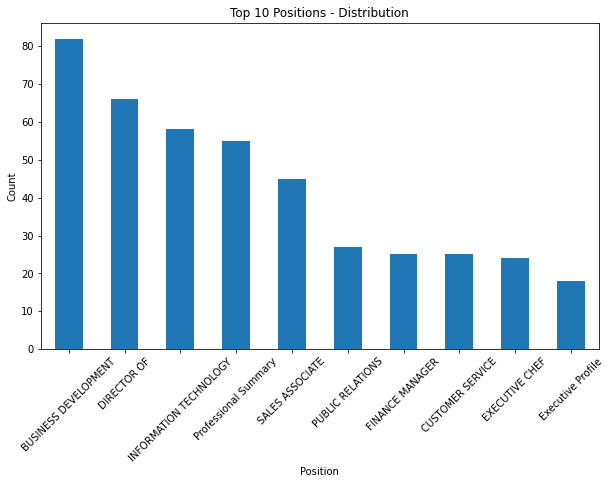

In [16]:
plt.figure(figsize=(10, 6))
top_position_counts.plot(kind='bar')
plt.title(f'Top {top_n} Positions - Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calculate the percentage of each top position
position_percentages = (top_position_counts / top_position_counts.sum()) * 100

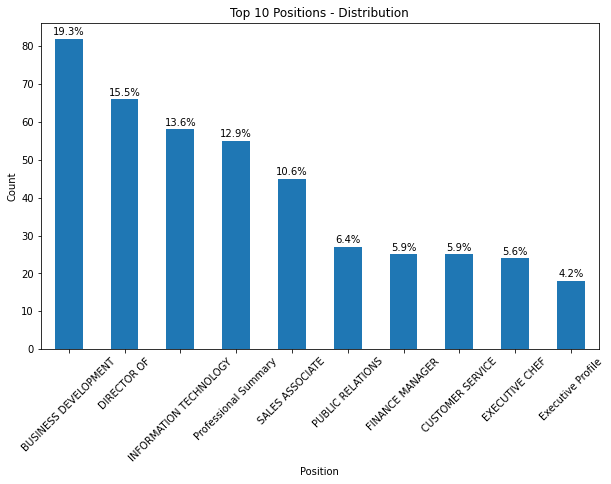

In [18]:
plt.figure(figsize=(10, 6))
top_position_counts.plot(kind='bar')
plt.title(f'Top {top_n} Positions - Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentage annotations to the bars
for i, count in enumerate(top_position_counts):
    percentage = position_percentages.iloc[i]
    plt.text(i, count + 1, f'{percentage:.1f}%', ha='center')

plt.show()

In [19]:
# Select the resumes for the top positions
top_positions = top_position_counts.index
top_resumes = df[df['POSITION_TITLE'].isin(top_positions)]

# Selecting Resumes for the Top Positions
# To gain deeper insights into the qualifications and characteristics of applicants for the top positions, 
# we have extracted the resumes that correspond to these positions. 
# By selecting only the resumes for the top positions, 
# we can focus our analysis on the specific group of applicants that are most relevant to our analysis objectives. 
# This allows us to examine the qualifications, education, experience, and other relevant information specifically tailored to the top positions. 
# By narrowing our focus to these resumes, we can uncover valuable patterns and trends that can inform decision-making and further analysis.


In [2043]:
# Analyze the qualifications for the top positions
qualifications_counts = top_resumes['QUALIFICATIONS'].value_counts().head(5)

In [2045]:
education_counts = top_resumes['EDUCATION_TYPE'].value_counts()
education_counts

Master         179
Bachelor       129
Diploma        100
Doctor           9
PhD              6
No info          1
High School      1
Name: EDUCATION_TYPE, dtype: int64

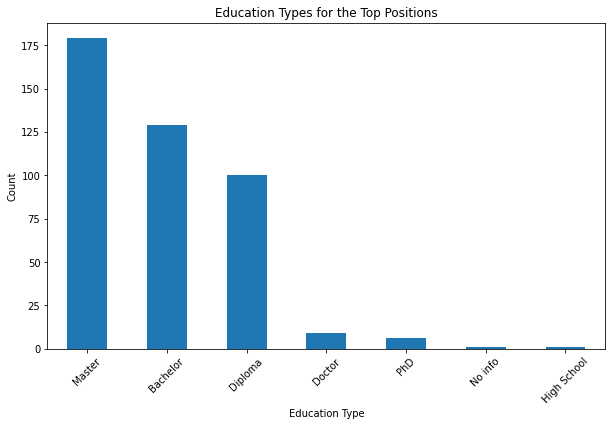

In [2046]:
# Analyze the education types for the top positions

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Education Types for the Top Positions')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Education Types Analysis:
The bar plot above displays the distribution of education types among the applicants for the top positions.
The x-axis represents the different education types, while the y-axis represents the count of applicants for each type.

Observations:
- Master's degree is the most common education type among the applicants, with 179 individuals holding this qualification.
- Bachelor's degree follows as the second most common education type, with 129 applicants.
- Diploma is the third most common education type, with 100 applicants.
- There are only a few applicants with higher-level degrees, such as Doctor and PhD, accounting for 9 and 6 applicants, respectively.
- One applicant has not provided any information about their education type, and another applicant holds a High School qualification.

In [2047]:
# Calculate the average experience length for each position
average_experience = top_resumes.groupby('POSITION_TITLE')['EXPERIENCE_LENGTH'].mean()
average_experience

POSITION_TITLE
BUSINESS DEVELOPMENT      13.689655
CUSTOMER SERVICE          10.294118
DIRECTOR OF               20.288889
EXECUTIVE CHEF            18.055556
Executive Profile         23.307692
FINANCE MANAGER           15.117647
INFORMATION TECHNOLOGY    20.236842
PUBLIC RELATIONS          14.000000
Professional Summary      12.302326
SALES ASSOCIATE           13.235294
Name: EXPERIENCE_LENGTH, dtype: float64

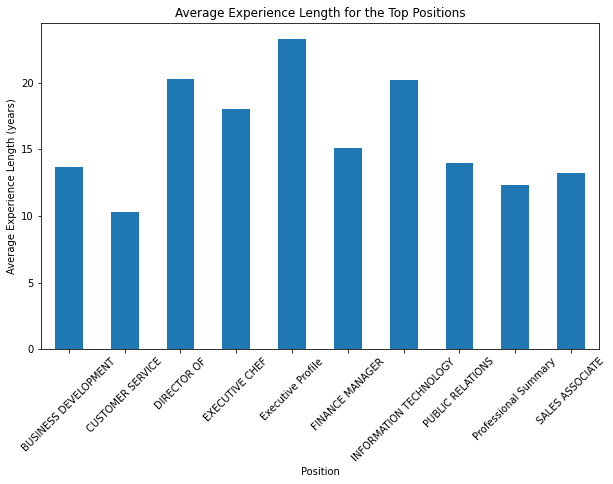

In [2048]:
plt.figure(figsize=(10, 6))
average_experience.plot(kind='bar')
plt.title('Average Experience Length for the Top Positions')
plt.xlabel('Position')
plt.ylabel('Average Experience Length (years)')
plt.xticks(rotation=45)
plt.show()

Average Experience Length Analysis:
The bar plot above displays the average experience length in years for each of the top positions.
The x-axis represents the position titles, while the y-axis represents the average experience length.

Observations:
- Executive Profile has the highest average experience length among the top positions, with an average of approximately 23.31 years.
- Director of and Information Technology positions also have relatively high average experience lengths, with averages of 20.29 and 20.24 years, respectively.
- Executive Chef and Finance Manager positions have average experience lengths of 18.06 and 15.12 years, respectively.
- Public Relations, Business Development, and Sales Associate positions have average experience lengths ranging from 13.69 to 14.00 years.
- Customer Service and Professional Summary positions have average experience lengths of approximately 10.29 and 12.30 years, respectively.

This analysis provides insights into the average experience length required or possessed by applicants for the top positions.
It helps to understand the level of experience expected or desirable for these roles and can aid in assessing the suitability of applicants based on experience.

In [2049]:
# Count the number of languages for each position
languages_counts = top_resumes.groupby('POSITION_TITLE')['LANGUAGES'].nunique()
languages_counts

POSITION_TITLE
BUSINESS DEVELOPMENT      11
CUSTOMER SERVICE           3
DIRECTOR OF               11
EXECUTIVE CHEF            10
Executive Profile          6
FINANCE MANAGER            4
INFORMATION TECHNOLOGY     9
PUBLIC RELATIONS           7
Professional Summary       9
SALES ASSOCIATE            8
Name: LANGUAGES, dtype: int64

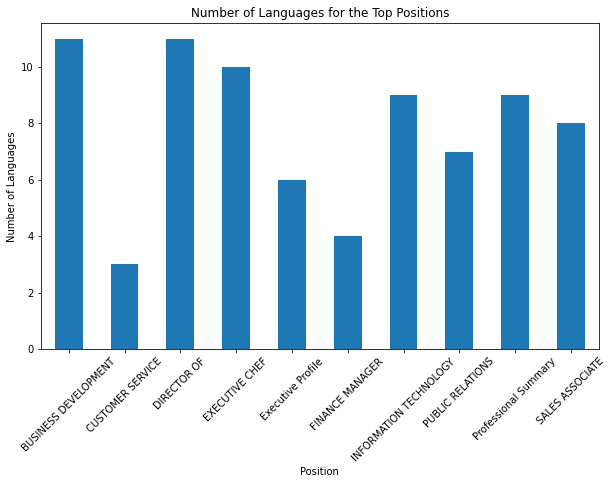

In [2050]:
plt.figure(figsize=(10, 6))
languages_counts.plot(kind='bar')
plt.title('Number of Languages for the Top Positions')
plt.xlabel('Position')
plt.ylabel('Number of Languages')
plt.xticks(rotation=45)
plt.show()

The 'languages_counts' series represents the number of unique languages known for each position in the 'top_resumes' DataFrame. Here's a breakdown of the results:

- BUSINESS DEVELOPMENT: This position requires knowledge of 11 different languages based on the resumes analyzed.
- CUSTOMER SERVICE: Applicants for this position possess proficiency in 3 languages.
- DIRECTOR OF: The Director of position seeks candidates with expertise in 11 different languages.
- EXECUTIVE CHEF: This position requires knowledge of 10 different languages.
- Executive Profile: Applicants with an Executive Profile are proficient in 6 languages.
- FINANCE MANAGER: Candidates for the Finance Manager position have knowledge of 4 languages.
- INFORMATION TECHNOLOGY: This position requires proficiency in 9 different languages.
- PUBLIC RELATIONS: Applicants for Public Relations have knowledge of 7 languages.
- Professional Summary: Candidates with a Professional Summary possess proficiency in 9 languages.
- SALES ASSOCIATE: This position requires knowledge of 8 different languages.

These results provide insights into the language requirements for each position. It shows the diversity of language skills sought after by employers for different roles. Candidates with proficiency in multiple languages may have an advantage when applying for positions that require communication with diverse audiences or international business opportunities.

The 'languages_counts' series helps identify the range of language skills needed across various positions, allowing job agencies to match candidates with the desired language proficiencies to the appropriate job opportunities.

In [2051]:
# Count the frequency of each language
languages_freq = top_resumes['LANGUAGES'].str.split(', ').explode().value_counts()
languages_freq

English       453
Spanish        78
French         36
Italian        13
German          9
Portuguese      9
Russian         3
Japanese        2
ITALIAN         2
SPANISH         2
FRENCH          2
Arabic          2
ENGLISH         1
spanish         1
Name: LANGUAGES, dtype: int64

In [2052]:
# Perform case normalization on the 'LANGUAGES' column
top_resumes['LANGUAGES'] = top_resumes['LANGUAGES'].str.upper()

# Count the frequency of each language
languages_freq = top_resumes['LANGUAGES'].str.split(', ').explode().value_counts()

# Combine the frequencies of 'italian' and 'ITALIAN'
# languages_freq['Italian'] += languages_freq['ITALIAN']
# languages_freq = languages_freq.drop('ITALIAN')

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_8979/644737337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_resumes['LANGUAGES'] = top_resumes['LANGUAGES'].str.upper()


In [2053]:
languages_freq

ENGLISH       454
SPANISH        81
FRENCH         38
ITALIAN        15
GERMAN          9
PORTUGUESE      9
RUSSIAN         3
JAPANESE        2
ARABIC          2
Name: LANGUAGES, dtype: int64

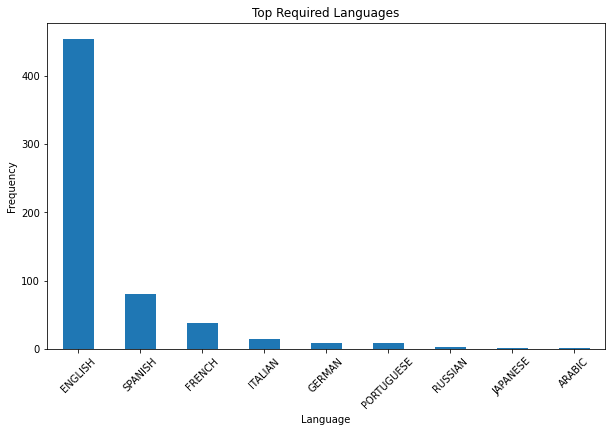

In [2054]:
# Plot the top required languages
plt.figure(figsize=(10, 6))
languages_freq.head(10).plot(kind='bar')
plt.title('Top Required Languages')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The  'languages_freq' series represents the frequency of each language mentioned in the 'LANGUAGES' column of the 'top_resumes' DataFrame.Here's a breakdown of the updated results:

- ENGLISH: English remains the most frequently mentioned language, appearing 454 times in the resumes.
- SPANISH: Spanish follows as the second most mentioned language, with a frequency of 81.
- FRENCH: French is mentioned 38 times.
- ITALIAN: The combined frequency of 'italian' and 'ITALIAN' is now 15.
- GERMAN: German is mentioned 9 times.
- PORTUGUESE: Portuguese is mentioned 9 times.
- RUSSIAN: Russian is mentioned 3 times.
- JAPANESE: Japanese is mentioned 2 times.
- ARABIC: Arabic is mentioned 2 times.


These results offer insights into the frequency of language mentions in the resumes for the top positions. English continues to be the most prevalent language, followed by Spanish, French, and Italian.

These findings can assist job agencies in identifying the most in-demand language skills among applicants and tailoring their recruitment strategies accordingly.

In [2055]:
# Count the frequency of each skill
skills_counts = top_resumes['SKILLS'].str.split(', ').explode().value_counts()
skills_counts

Excel                                                                                                                                                                                                                                                                                     91
clients                                                                                                                                                                                                                                                                                   67
sales                                                                                                                                                                                                                                                                                     60
marketing                                                                                                                                        

In [2056]:
# Clean the skills column by removing leading/trailing whitespace and special characters
top_resumes['SKILLS'] = top_resumes['SKILLS'].str.strip().str.replace("'", "")

# Count the frequency of each skill
skills_counts = top_resumes['SKILLS'].str.split(', ').explode().value_counts()

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_8979/2481147861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_resumes['SKILLS'] = top_resumes['SKILLS'].str.strip().str.replace("'", "")


In [2057]:
skills_counts

Excel                                                                                                                                                                                                                  92
clients                                                                                                                                                                                                                67
marketing                                                                                                                                                                                                              60
sales                                                                                                                                                                                                                  60
budget                                                                                                                          

In [2065]:
# Select the top N skills to display
top_n = 10
top_skills_counts = skills_counts.head(top_n)
top_skills_counts

Excel               92
clients             67
marketing           60
sales               60
budget              57
customer service    53
quality             48
Sales               46
contracts           46
policies            46
Name: SKILLS, dtype: int64

In [2080]:
# Convert skills to lowercase before counting frequencies
skills_counts.index = skills_counts.index.str.lower()

# Combine 'sales' and 'Sales' into a single category
skills_counts['sales'] = skills_counts.get('sales', 0) + skills_counts.get('Sales', 0)
skills_counts.drop(['sales', 'Sales'], inplace=True, errors='ignore')

In [2081]:
top_skills_counts

excel               92
clients             67
marketing           60
budget              57
customer service    53
quality             48
contracts           46
policies            46
meetings            45
client              44
Name: SKILLS, dtype: int64

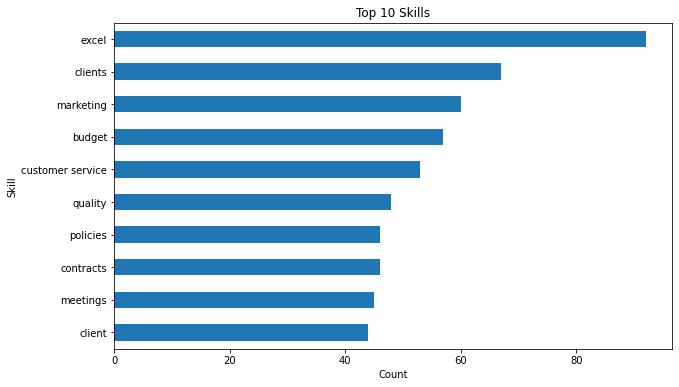

In [2082]:

# Plot the top skills
plt.figure(figsize=(10, 6))
top_skills_counts.sort_values().plot(kind='barh')
plt.title(f'Top {top_n} Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()


In [2093]:
# Analyze the community service activities of applicants for the top positions
community_service_counts = top_resumes['COMMUNITY_SERVICE'].value_counts().head(5)
community_service_counts

No     383
Yes     42
Name: COMMUNITY_SERVICE, dtype: int64

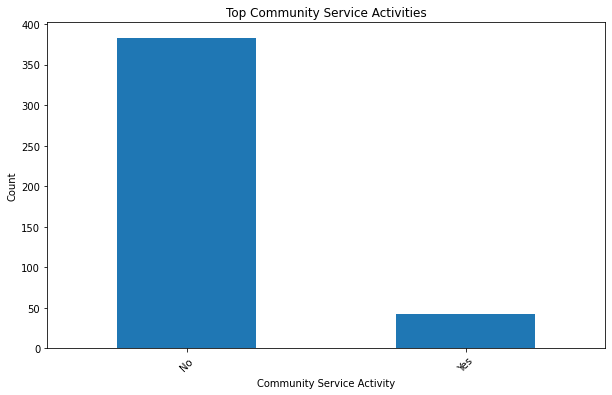

In [2095]:
# Plot the top community service activities
plt.figure(figsize=(10, 6))
community_service_counts.plot(kind='bar')
plt.title('Top Community Service Activities')
plt.xlabel('Community Service Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [2096]:
# Analyze the volunteering activities of applicants for the top positions
volunteering_counts = top_resumes['VOLUNTEERING'].value_counts().head(5)
volunteering_counts

No     389
Yes     36
Name: VOLUNTEERING, dtype: int64

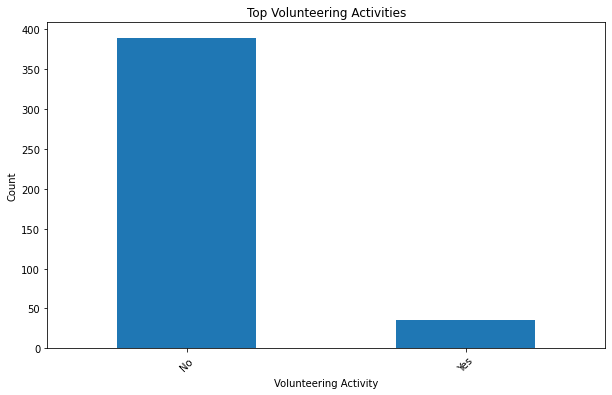

In [2097]:
# Plot the top volunteering activities
plt.figure(figsize=(10, 6))
volunteering_counts.plot(kind='bar')
plt.title('Top Volunteering Activities')
plt.xlabel('Volunteering Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [2098]:
# Analyze the availability of driver's license for the top positions
driver_license_counts = top_resumes['DRIVERS_LICENSE_AVAILABILITY'].value_counts()
driver_license_counts

No     421
Yes      4
Name: DRIVERS_LICENSE_AVAILABILITY, dtype: int64

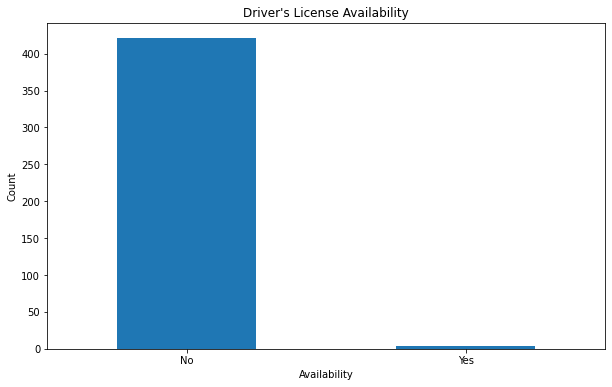

In [2099]:
# Plot the driver's license availability
plt.figure(figsize=(10, 6))
driver_license_counts.plot(kind='bar')
plt.title('Driver\'s License Availability')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### correlation analysis

In [2101]:
# Perform correlation analysis
correlation_matrix = df.corr()

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_8979/190382341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


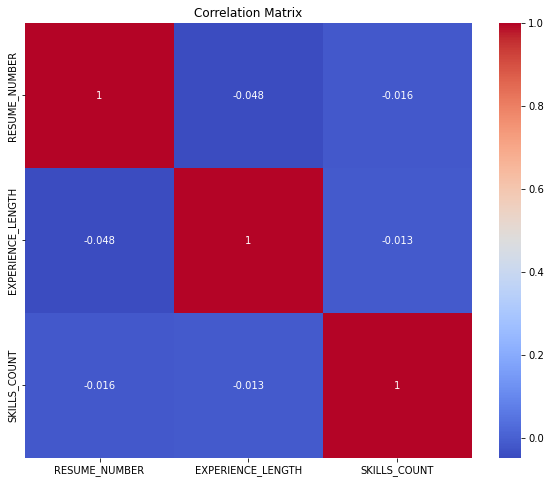

In [2102]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, the following correlations are observed:

- Resume_number with Experience_length: The correlation coefficient of -0.048 indicates a very weak negative correlation between resume number and experience length. This suggests that there is no significant relationship between the number assigned to each resume and the length of experience mentioned in the resume.

- Skills_count with Resume_number: The correlation coefficient of -0.016 suggests a very weak negative correlation between the number of skills mentioned in a resume and the resume number. This indicates that there is no significant relationship between the number assigned to each resume and the count of skills mentioned.

- Skills_count with Experience_length: The correlation coefficient of -0.013 indicates a very weak negative correlation between the number of skills mentioned in a resume and the experience length. This implies that there is no substantial relationship between the count of skills and the length of experience mentioned in the resume.

Overall, these correlations are close to zero, suggesting that there is no strong linear relationship between these variables.

it is important to note that correlation coefficients close to zero do not necessarily imply the absence of a relationship; there might be nonlinear or non-monotonic relationships that cannot be captured by linear correlation analysis. 

### Descriptive Statistics

In [2103]:
# Calculate descriptive statistics for numerical variables
numeric_cols = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT']
numeric_stats = df[numeric_cols].describe()
print(numeric_stats)

       EXPERIENCE_LENGTH  SKILLS_COUNT
count        1714.000000   2484.000000
mean           15.844224      9.272544
std            18.795849     13.291649
min             0.000000      0.000000
25%             6.000000      1.000000
50%            12.000000      3.000000
75%            20.000000     10.000000
max           314.000000    105.000000


The descriptive statistics for the numerical variables 'EXPERIENCE_LENGTH' and 'SKILLS_COUNT' are as follows:

- 'EXPERIENCE_LENGTH':

    - Count: There are 1,714 non-null values available for the 'EXPERIENCE_LENGTH' variable.
    - Mean: The average experience length is approximately 15.84 years.
    - Standard Deviation: The standard deviation is approximately 18.80, indicating a relatively high variability in the data.
    - Minimum: The minimum experience length is 0 years, which suggests the presence of individuals with no experience.
    - 25th Percentile: 25% of the values fall below 6 years of experience.
    - Median (50th Percentile): 50% of the values fall below 12 years of experience, indicating the middle value in the dataset.
    - 75th Percentile: 75% of the values fall below 20 years of experience.
    - Maximum: The maximum experience length is 314 years, which could potentially be an outlier.

- 'SKILLS_COUNT':

  - Count: There are 2,484 non-null values available for the 'SKILLS_COUNT' variable.
  - Mean: The average number of skills is approximately 9.27.
  - Standard Deviation: The standard deviation is approximately 13.29, indicating a relatively high variability in the data.
  - Minimum: The minimum number of skills is 0, suggesting the presence of individuals with no listed skills.
  - 25th Percentile: 25% of the values fall below 1 skill.
  - Median (50th Percentile): 50% of the values fall below 3 skills, indicating the middle value in the dataset.
  - 75th Percentile: 75% of the values fall below 10 skills.
  - Maximum: The maximum number of skills is 105, which could potentially be an outlier.

### Feature Engineering
Create new features or transform existing ones to capture meaningful information

In [2117]:
# Create a binary feature indicating whether a resume has received an award
df['AWARD_RECEIVED'] = df['AWARDS'].apply(lambda x: 1 if x != '[]' else 0)
# 'AWARD_RECEIVED': Indicates whether a resume has received an award (1 if an award is listed, 0 otherwise).
df['AWARD_RECEIVED']

0       1
1       1
2       1
3       1
4       1
       ..
2487    1
2488    1
2489    1
2490    1
2491    1
Name: AWARD_RECEIVED, Length: 2484, dtype: int64

In [2120]:
df['COMMUNITY_SERVICE_AVAILABLE'] = df['COMMUNITY_SERVICE'].apply(lambda x: 1 if x != '[]' else 0)
# 'COMMUNITY_SERVICE_AVAILABLE': Indicates whether community service is listed in the resume (1 if community service is listed, 0 otherwise).
df['COMMUNITY_SERVICE_AVAILABLE']

0       1
1       1
2       1
3       1
4       1
       ..
2487    1
2488    1
2489    1
2490    1
2491    1
Name: COMMUNITY_SERVICE_AVAILABLE, Length: 2484, dtype: int64

In [2121]:
df['VOLUNTEERING_AVAILABLE'] = df['VOLUNTEERING'].apply(lambda x: 1 if x != '[]' else 0)
# 'VOLUNTEERING_AVAILABLE': Indicates whether volunteering experience is listed in the resume (1 if volunteering experience is listed, 0 otherwise).
df['VOLUNTEERING_AVAILABLE']

0       1
1       1
2       1
3       1
4       1
       ..
2487    1
2488    1
2489    1
2490    1
2491    1
Name: VOLUNTEERING_AVAILABLE, Length: 2484, dtype: int64

In [2125]:
df['DRIVERS_LICENSE_AVAILABLE'] = df['DRIVERS_LICENSE_AVAILABILITY'].apply(lambda x: 1 if x == 'Yes' else 0)
#'DRIVERS_LICENSE_AVAILABLE': Indicates whether a driver's license is available (1 if a driver's license is available, 0 otherwise).
df['DRIVERS_LICENSE_AVAILABLE']

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_8979/2080076712.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['DRIVERS_LICENSE_AVAILABLE'][:-7]


0       0
1       0
2       0
3       0
4       0
       ..
2480    0
2481    0
2482    0
2483    0
2484    0
Name: DRIVERS_LICENSE_AVAILABLE, Length: 2477, dtype: int64

In [2126]:
# Select features for modeling
features = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT', 'DRIVERS_LICENSE_AVAILABLE']